# in this note book i made four steps :
1_ import libraries and read data , explain it.
2_data visulization.
3_data engineering and cleaning data.
4_models and evoluation

# import libraries

In [94]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

# Read train Data

In [95]:

train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#size of train data_set  891 there  are some null  data

# read test file

In [97]:

test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
#size of test data_set  418 there  are some null  data not found survived column

# unique valuesin train data

In [100]:

train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# number of survived and age

In [101]:

survived_df=train_df.Survived.value_counts(normalize=True)
age_count=train_df.Age.value_counts()
print('survived and unsurvived',survived_df)
print('agecount',age_count)

survived and unsurvived 0    0.616162
1    0.383838
Name: Survived, dtype: float64
agecount 24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50   

#62% is un survived
#38% is survived
#between 20 to 30 is the most age

In [102]:
survived_unsurvived_age=train_df.groupby('Survived')['Age'].describe()
print(survived_unsurvived_age)

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [103]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# find null data

In [104]:

null_data=train_df.isnull().sum()
print(null_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#there are many null data in age and cabin column


# Data visulization

In [105]:
#count numbers of sibsp in titanic
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_Sibsp=train_df['SibSp'].value_counts().sort_values(ascending=False)
data = [go.Bar(
        x = num_Sibsp.index, 
        y = num_Sibsp.values, 
)]

plotly.offline.iplot(data)

# count numbers of parch in titanic

In [106]:

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_Parch=train_df['Parch'].value_counts().sort_values(ascending=False)
data = [go.Bar(
        x = num_Parch.index, 
        y = num_Parch.values, 
)]

plotly.offline.iplot(data)

# average of age and counts of age

In [107]:
avg=train_df['Age'].mean()
data = [go.Histogram(
        x = train_df['Age']
)]

# Vertical dashed line to indicate the average age
layout = {'shapes': [{
              'type' :'line',
              'x0': avg,
              'y0': 0,
              'x1': avg,
              'y1': 40,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

# the relation between age and survived

Text(0.5, 1.0, 'the relation between age and survived')

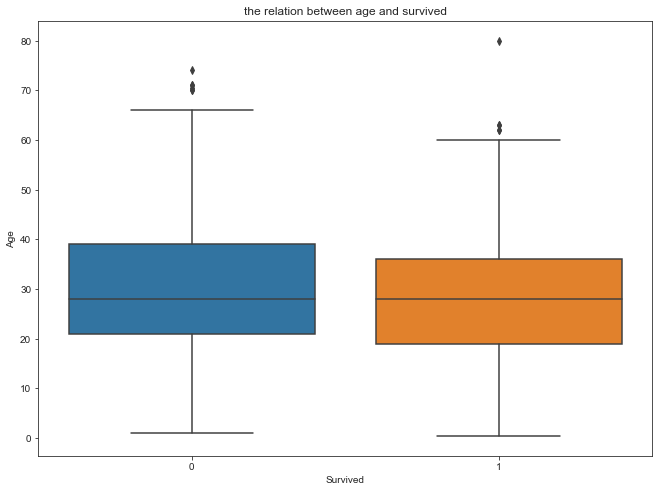

In [108]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Survived', y = 'Age', data =train_df)
ax.set_title('the relation between age and survived')


# the relation between sex and Age

Text(0.5, 1.0, 'the relation between sex and Age')

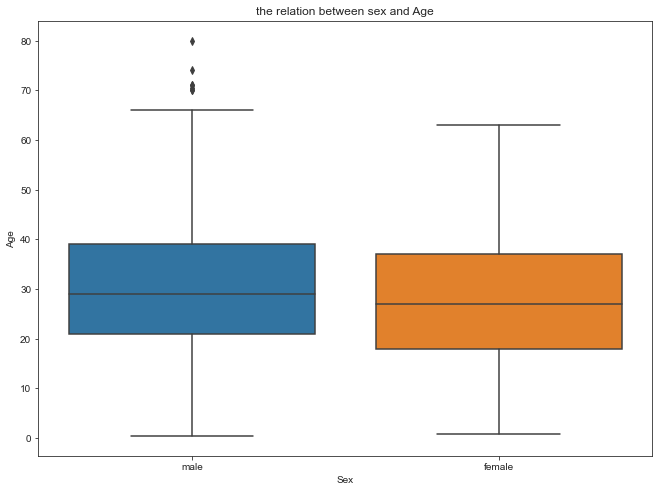

In [109]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Sex', y = 'Age', data =train_df)
ax.set_title('the relation between sex and Age')

# the relation between sex and pclass

Text(0.5, 1.0, 'the relation between sex and pclass')

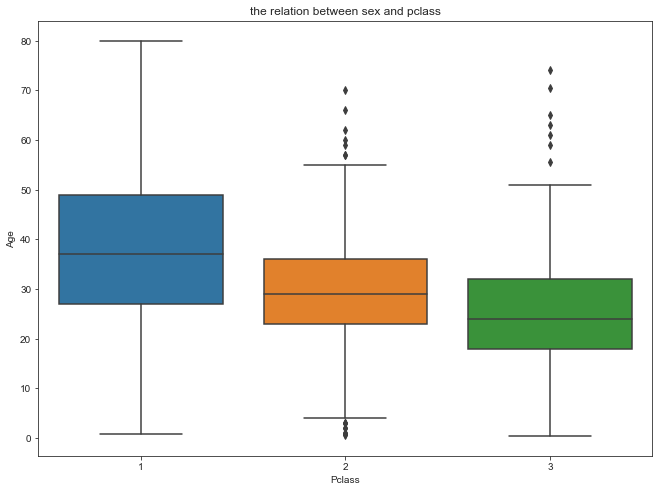

In [110]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Pclass', y = 'Age', data =train_df)
ax.set_title('the relation between sex and pclass')

# the relation between sex and pclass

Text(0.5, 1.0, 'the relation between sex and pclass')

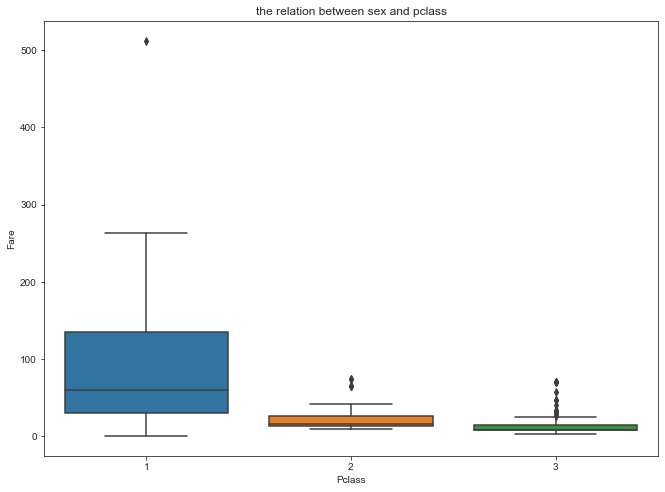

In [111]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Pclass', y = 'Fare', data =test_df)
ax.set_title('the relation between sex and pclass')

# the relation between(pclass,age) using sex

Text(0.5, 1.0, 'the relation between pclass and Age')

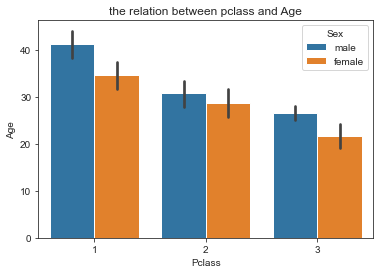

In [112]:
#the relation between(pclass,age) using sex
ax = sns.barplot(x = 'Pclass', y = 'Age', data =train_df,hue='Sex')
ax.set_title('the relation between pclass and Age')

# the relation between(Embarked and Age) using sex

Text(0.5, 1.0, 'the relation between Embarked and Age')

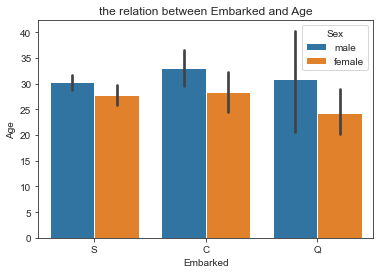

In [113]:

ax = sns.barplot(x = 'Embarked', y = 'Age', data =train_df,hue='Sex')
ax.set_title('the relation between Embarked and Age')

# the relation between(Survived and Age) using sex

Text(0.5, 1.0, 'the relation between survived and Age')

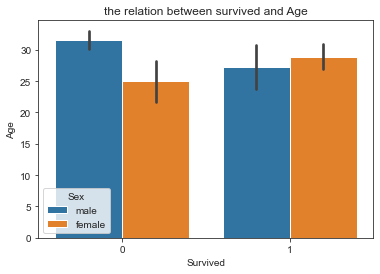

In [114]:

ax = sns.barplot(x = 'Survived', y = 'Age', data =train_df,hue='Sex')
ax.set_title('the relation between survived and Age')

# the relation between(Sibsp,age) using sex

Text(0.5, 1.0, 'the relation between SipSip and age')

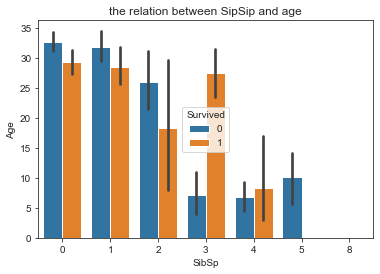

In [115]:

ax = sns.barplot(x = 'SibSp', y = 'Age', data =train_df,hue='Survived')
ax.set_title('the relation between SipSip and age')

# the relation between(parch,parch) using sex

Text(0.5, 1.0, 'the relation between parch and age')

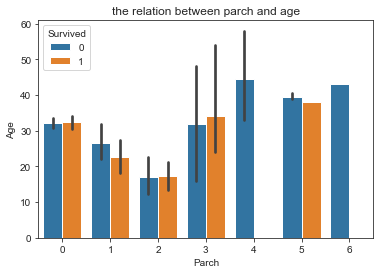

In [116]:

ax = sns.barplot(x = 'Parch', y = 'Age', data =train_df,hue='Survived')
ax.set_title('the relation between parch and age')

# Corelation Matrix

Text(0.5, 1.0, 'Corelation Matrix')

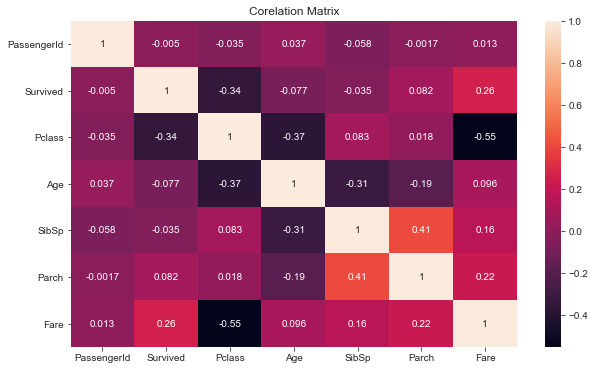

In [117]:
plt.figure(figsize = (10, 6))
sns.heatmap(train_df.corr(), annot=True)
plt.title('Corelation Matrix')

# Feature Engineering Data an cleaning Data

In [118]:
cabin=train_df.Cabin.value_counts()
cabin

G6                 4
C23 C25 C27        4
B96 B98            4
E101               3
D                  3
F2                 3
C22 C26            3
F33                3
B49                2
B28                2
B18                2
B5                 2
C124               2
C52                2
C123               2
B20                2
C92                2
E44                2
E121               2
D17                2
B77                2
C68                2
D33                2
F G73              2
D26                2
E33                2
B35                2
C65                2
E24                2
E67                2
E25                2
C2                 2
C93                2
F4                 2
C126               2
B51 B53 B55        2
D35                2
C83                2
D20                2
B22                2
C125               2
B57 B59 B63 B66    2
D36                2
B58 B60            2
E8                 2
C78                2
B30                1
D56          

# drop cabin column there are many missing data 

In [119]:
#drop cabin
train_df.drop(train_df.columns[10],axis=1,inplace=True)


In [120]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [121]:
test_df.drop(test_df.columns[9],axis=1,inplace=True)

In [122]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# replace gender to numerical

In [123]:
male=train_df.Sex.replace({'male':0,'female':1},inplace=True)


In [124]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [125]:
test_df.Sex.replace({'male':0,'female':1},inplace=True)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [126]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
gender=test_df.Sex.value_counts()
print(gender)

0    266
1    152
Name: Sex, dtype: int64


In [128]:
#add colum called family number to count all familly number
train_df['familynum']=train_df['SibSp']+train_df['Parch']+1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familynum
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1


In [129]:
test_df['familynum']=test_df['SibSp']+test_df['Parch']+1
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familynum
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,3


# drop missing value in fare and Embarked column

In [130]:

train_df.Fare.dropna()
train_df.Embarked.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  familynum    891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


# test data drop missing data fare embarked

In [131]:

test_df.Fare.dropna()
test_df.Embarked.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  familynum    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


# fill missing data in age beacuase there are more missing data

In [132]:

def clean_train_data(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 38
        elif  Pclass == 2 :
            return 29
        else : 
            return 24
    else : 
        return Age
  

In [133]:
def clean_test_data(columns) :
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 44
        elif  Pclass == 2 :
            return 27
        else : 
            return 23
    else : 
        return Age

In [134]:
train_df.Age=train_df[['Age','Pclass']].apply(clean_train_data,axis=1) 
test_df.Age=test_df[['Age','Pclass']].apply(clean_test_data,axis=1) 

In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  familynum    891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [136]:
train_df.Age.value_counts()

24.00    166
38.00     41
29.00     31
22.00     27
18.00     26
30.00     25
19.00     25
28.00     25
21.00     24
25.00     23
36.00     22
32.00     18
27.00     18
26.00     18
35.00     18
31.00     17
16.00     17
23.00     15
34.00     15
33.00     15
20.00     15
39.00     14
42.00     13
40.00     13
17.00     13
45.00     12
2.00      10
50.00     10
4.00      10
48.00      9
44.00      9
47.00      9
54.00      8
9.00       8
1.00       7
51.00      7
41.00      6
37.00      6
3.00       6
14.00      6
52.00      6
49.00      6
43.00      5
58.00      5
15.00      5
11.00      4
5.00       4
56.00      4
8.00       4
62.00      4
60.00      4
46.00      3
7.00       3
61.00      3
65.00      3
6.00       3
55.00      2
71.00      2
28.50      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
59.00      2
10.00      2
64.00      2
40.50      2
45.50      2
32.50      2
20.50      1
24.50      1
0.67       1
70.50      1
0.92       1

In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  familynum    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


# fill missing data in Fare

In [138]:
test_df.Fare.fillna(test_df.Fare.mean(),inplace=True)

In [139]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  familynum    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  familynum    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


# convert our categorical columns to dummies

In [141]:
features = ["Pclass","Sex", "SibSp", "Parch",'familynum']
X = pd.get_dummies(train_df[features])

X_testm = pd.get_dummies(test_df[features])
X.head(10)

,Pclass,Sex,SibSp,Parch,familynum
0,3,0,1,0,2
1,1,1,1,0,2
2,3,1,0,0,1
3,1,1,1,0,2
4,3,0,0,0,1
5,3,0,0,0,1
6,1,0,0,0,1
7,3,0,3,1,5
8,3,1,0,2,3
9,2,1,1,0,2


In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pclass     891 non-null    int64
 1   Sex        891 non-null    int64
 2   SibSp      891 non-null    int64
 3   Parch      891 non-null    int64
 4   familynum  891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


# Model and evaluation

In [143]:
X=X
y=train_df.Survived

# split data 

In [144]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Scalar Data

In [145]:
from sklearn.preprocessing import StandardScaler 

X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# support Vector

In [146]:
from sklearn.svm import SVC
svcmodel=SVC(kernel='poly',random_state=0)
svcmodel.fit(X_train,y_train)
print('train score ;',svcmodel.score(X_train,y_train))
print('test score ;',svcmodel.score(X_test,y_test))

train score ; 0.8103932584269663
test score ; 0.7932960893854749


In [147]:
y_pred=svcmodel.predict(X_test)
print('predicted value for model ;',y_pred)

predicted value for model ; [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


# make the confusion matrix

In [148]:

from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm



array([[92, 13],
       [24, 50]], dtype=int64)

<AxesSubplot:>

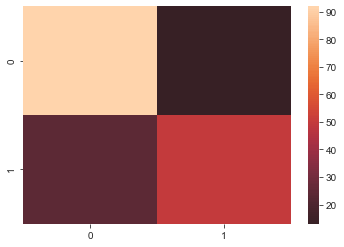

In [149]:
sns.heatmap(cm,center=True)

# logistic regression

In [150]:
from sklearn.linear_model import  LogisticRegression

In [151]:
lgr=LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=33, solver='sag')

In [152]:
print(' logistic train score ;',lgr.score(X_train,y_train))
print(' logistic test score ;',lgr.score(X_test,y_test))
print(' logistic classes :',lgr.classes_)
print(' logistic iteration :', lgr.n_iter_)

 logistic train score ; 0.8019662921348315
 logistic test score ; 0.7877094972067039
 logistic classes : [0 1]
 logistic iteration : [24]


In [153]:
#prediction
y_pred1=lgr.predict(X_test)
y_pred_proba=lgr.predict_proba(X_test)
print('predicted value for logistic ',y_pred1[:10])
print('predicted probability value  for logistic ',y_pred_proba[:10])
print('accuracy =',accuracy_score(y_test,y_pred1))
cm=confusion_matrix(y_test,y_pred1)
print('confusion_matrix=',cm)

predicted value for logistic  [0 0 0 1 1 1 1 0 1 1]
predicted probability value  for logistic  [[0.93076741 0.06923259]
 [0.79123583 0.20876417]
 [0.89645941 0.10354059]
 [0.22503602 0.77496398]
 [0.46488485 0.53511515]
 [0.10453735 0.89546265]
 [0.37857545 0.62142455]
 [0.94625712 0.05374288]
 [0.37857545 0.62142455]
 [0.1215842  0.8784158 ]]
accuracy = 0.7877094972067039
confusion_matrix= [[91 14]
 [24 50]]


# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
DTR=DecisionTreeRegressor(max_depth=15)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15)

In [155]:
#score model
print('DecisionTreeRegressor train score ;',DTR.score(X_train,y_train))
print('DecisionTreeRegressor test score ;',DTR.score(X_test,y_test))

DecisionTreeRegressor train score ; 0.47583699609976726
DecisionTreeRegressor test score ; 0.38393893511954713


In [156]:
#overfitting model

In [157]:
#prediction
y_pred2=DTR.predict(X_test)
y_pred2[:10]

array([1.        , 0.10169492, 0.13084112, 1.        , 0.4375    ,
       0.96428571, 0.58333333, 0.14285714, 0.58333333, 1.        ])

In [158]:
print(y_test[:10])
print(y_pred2[:10])

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64
[1.         0.10169492 0.13084112 1.         0.4375     0.96428571
 0.58333333 0.14285714 0.58333333 1.        ]


# Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [160]:
#score model
print('Random Forest Classifier train score ;',RFC.score(X_train,y_train))
print('Random Forest Classifier test score ;',RFC.score(X_test,y_test))

Random Forest Classifier train score ; 0.8132022471910112
Random Forest Classifier test score ; 0.7932960893854749


In [161]:
#prediction
y_pred3=RFC.predict(X_test)
y_pred3[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

# Gradient Boosting Classifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=2)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=2)

In [163]:
#score model
print('Gradient Boosting Classifier train score ;',GBC.score(X_train,y_train))
print('Gradient Boosting Classifier test score ;',GBC.score(X_test,y_test))

Gradient Boosting Classifier train score ; 0.824438202247191
Gradient Boosting Classifier test score ; 0.7877094972067039


In [164]:
#prediction
y_pred4=GBC.predict(X_test)
y_pred_proba4=GBC.predict_proba(X_test)
print(y_pred4[:10])
print(y_pred_proba4[:10])

[0 0 0 1 1 1 1 0 1 1]
[[0.59623145 0.40376855]
 [0.891652   0.108348  ]
 [0.86825146 0.13174854]
 [0.02170406 0.97829594]
 [0.46085062 0.53914938]
 [0.03145365 0.96854635]
 [0.41916721 0.58083279]
 [0.7767584  0.2232416 ]
 [0.41916721 0.58083279]
 [0.05266643 0.94733357]]


In [165]:
#confusion_matrix
cm=confusion_matrix(y_test,y_pred4)
print('confusion_matrix=',cm)

confusion_matrix= [[91 14]
 [24 50]]


# KNeighborsClassifier

In [166]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [167]:
#score model
print('KNeighbors Classifier train score ;',KNN.score(X_train,y_train))
print('KNeighbors Classifier test score ;',KNN.score(X_test,y_test))

KNeighbors Classifier train score ; 0.7893258426966292
KNeighbors Classifier test score ; 0.776536312849162


In [168]:
#prediction
y_pred5=KNN.predict(X_test)
print(y_pred5[:10])

[0 0 0 1 0 1 1 0 1 1]


# XGBClassifier

In [169]:
!pip install  xgboost==1.4.1

In [170]:
from  xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.99, max_depth= 5,n_estimators= 8,random_state=30)
xgb.fit(X_train,y_train)
print('train score :',xgb.score(X_train,y_train))
print('test score :',xgb.score(X_test,y_test))

[09:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score : 0.8132022471910112
test score : 0.7932960893854749


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



# Cross validiation

In [171]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model1=svcmodel
model2=lgr
model3=DTR
model4=RFC
model5=GBC
model6=KNN
model7=xgb
models=[model1,model2,model3,model4,model5,model6,model7]
kfold = KFold(n_splits=10, random_state=2020, shuffle=True)
mean=[]
standrad=[]
accuracy=[]
classifiers=['svcmodel','lgr','DTR','RFC','GBC','KNN','xgb']
for model in models:
    cv_result = cross_val_score(model,X,y,cv= kfold)
    cv_result=cv_result
    mean.append(cv_result.mean())
    standrad.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'Mean':mean,'Std':standrad},index=classifiers)       
new_models_dataframe2

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\User\anaconda3\lib\

[09:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Mean,Std
svcmodel,0.800162,0.053534
lgr,0.799051,0.046072
DTR,0.351326,0.123795
RFC,0.808027,0.045516
GBC,0.776654,0.054688
KNN,0.763146,0.048741
xgb,0.800200,0.044982


In [172]:
accuracy1=[]
accuracy2=[]
for model in models:
    m1=model.score(X_test,y_test)
    m2=model.score(X_train,y_train)
    accuracy1.append(m1)
    accuracy2.append(m2)
new_models_dataframe2=pd.DataFrame({'train_score':accuracy2,'test_score':accuracy1},index=classifiers)       
new_models_dataframe2

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



,train_score,test_score
svcmodel,0.810393,0.793296
lgr,0.801966,0.787709
DTR,0.475837,0.383939
RFC,0.813202,0.793296
GBC,0.824438,0.787709
KNN,0.789326,0.776536
xgb,0.813202,0.793296


In [173]:
# Random Forest  Classifier is best model because best mean and min std

# Final model

In [179]:
y_pred_model=GBC.fit(X,y).predict(X_testm)

In [180]:
final_model = {'PassengerId': test_df.PassengerId, 'Survived':y_pred_model}
submission = pd.DataFrame(data=final_model)
submission.to_csv('submission_model7.csv',index =False)

In [181]:
pd.set_option('display.max_rows', None)

In [182]:
sm=pd.read_csv('submission_model7.csv')
sm

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [183]:
df=pd.read_csv('gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
